In [1]:
import numpy as np

# Function to read ASCII raster file
def read_asc_file(file_path):
    # Read header information
    with open(file_path, 'r') as f:
        ncols = None
        nrows = None
        xllcorner = None
        yllcorner = None
        cellsize = None
        nodata_value = None

        for line in f:
            line = line.strip().split()
            if len(line) == 2:
                if line[0].lower() == 'ncols':
                    ncols = int(line[1])
                elif line[0].lower() == 'nrows':
                    nrows = int(line[1])
                elif line[0].lower() == 'xllcorner':
                    xllcorner = float(line[1])
                elif line[0].lower() == 'yllcorner':
                    yllcorner = float(line[1])
                elif line[0].lower() == 'cellsize':
                    cellsize = float(line[1])
                elif line[0].lower() == 'nodata_value':
                    nodata_value = float(line[1])
            else:
                break

    # Read data values
    data = np.genfromtxt(file_path, skip_header=6)

    return {
        'ncols': ncols,
        'nrows': nrows,
        'xllcorner': xllcorner,
        'yllcorner': yllcorner,
        'cellsize': cellsize,
        'nodata_value': nodata_value,
        'data': data
    }


In [2]:
import matplotlib.pyplot as plt

In [3]:
# Example usage
file_path = r""
data = read_asc_file(file_path)
print(data["data"])
print(data["data"].shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(722, 417)


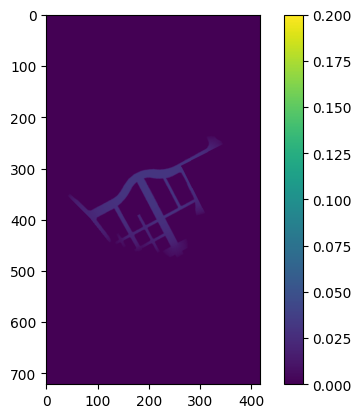

In [4]:
plt.figure()
plt.imshow(data["data"])
plt.clim(0.0,0.2)
plt.colorbar()

In [5]:
data_np = np.array(data["data"])

In [8]:
def avg_pool(arr):
    arr = np.pad(arr, ((0, 0), (0, 1)), mode='constant')
    x, y = arr.shape
    new_x, new_y = x//2, y//2
    arr = np.mean(arr.reshape(new_x, 2, new_y, 2), axis=(1, 3))
    return arr

(361, 209)


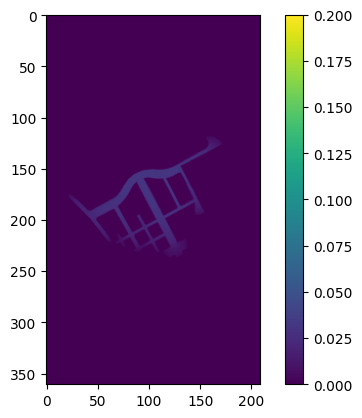

In [10]:
print(avg_pool(data_np).shape)
plt.imshow(avg_pool(data_np))
plt.clim(0.0,0.2)
plt.colorbar()

In [1]:
from dataloader import CustomDataset
import torch
from tqdm import tqdm

root_pth = r"D:\Study\AI_CFD\SWE\datasets"

dataset = CustomDataset(root_pth)
length = len(dataset)
means = 0
stds = 0
pmeans, pstds = 0, 0
for d in tqdm(range(length)):
    x, p = dataset[d]
    mean = torch.mean(x, dim=(1, 2))
    std = torch.std(x, dim=(1, 2))
    pmean = torch.mean(p)
    pstd = torch.std(p)
    pmeans += pmean
    pstds += pstd

    means += mean
    stds += std

means /= length
stds /= length
pmeans /= length
pstds /= length

print("Overall mean of each channel (depth, xvel, yvel):", means)
print("Overall standard deviation of each channel (depth, xvel, yvel):", stds)

print()
print("pmeans and pstds: ", pmeans, pstds)

100%|██████████| 19440/19440 [2:25:33<00:00,  2.23it/s]  

Overall mean of each channel (depth, xvel, yvel): tensor([ 0.0059,  0.0004, -0.0045])
Overall standard deviation of each channel (depth, xvel, yvel): tensor([0.0198, 0.0300, 0.0297])

pmeans and pstds:  tensor(0.2188) tensor(0.6068)
